Init:

In [25]:
from matplotlib import pyplot
import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Process the Trips CSV file
trips_df = pd.read_csv("../ferry_tips_data.csv")


Filter for only line 17

c:\Tools\SDK\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Tools\SDK\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Tools\SDK\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Tools\SDK\

       route_id    route_name ferry_name  ferry_id  \
16582        17  Oxdjupsleden  Fragancia       289   
16583        17  Oxdjupsleden  Fragancia       289   
16584        17  Oxdjupsleden  Fragancia       289   
16585        17  Oxdjupsleden  Fragancia       289   
16586        17  Oxdjupsleden  Fragancia       289   
16587        17  Oxdjupsleden  Fragancia       289   
16588        17  Oxdjupsleden  Fragancia       289   
16589        17  Oxdjupsleden  Fragancia       289   
16590        17  Oxdjupsleden  Fragancia       289   
16591        17  Oxdjupsleden  Fragancia       289   
16592        17  Oxdjupsleden  Fragancia       289   
16593        17  Oxdjupsleden  Fragancia       289   
16594        17  Oxdjupsleden  Fragancia       289   
16595        17  Oxdjupsleden  Fragancia       289   
16596        17  Oxdjupsleden  Fragancia       289   
16597        17  Oxdjupsleden  Fragancia       289   
16598        17  Oxdjupsleden  Fragancia       289   
16599        17  Oxdjupslede

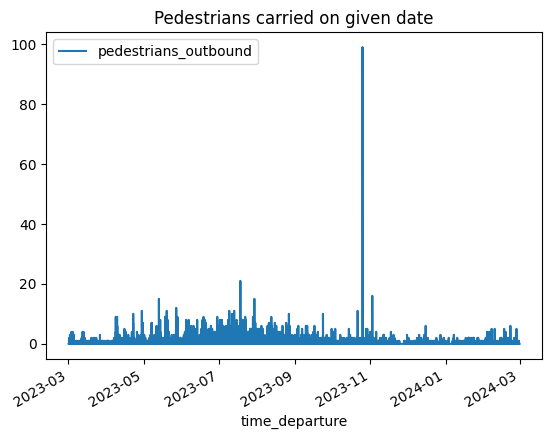

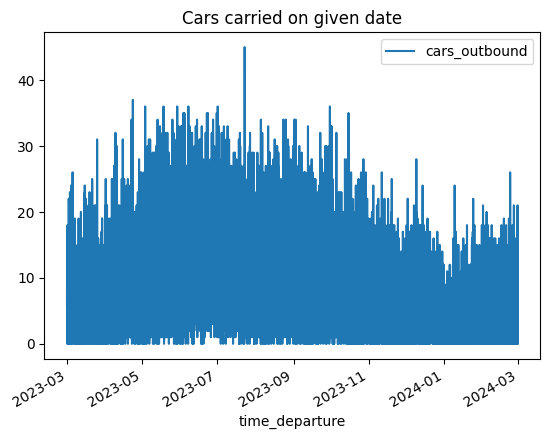

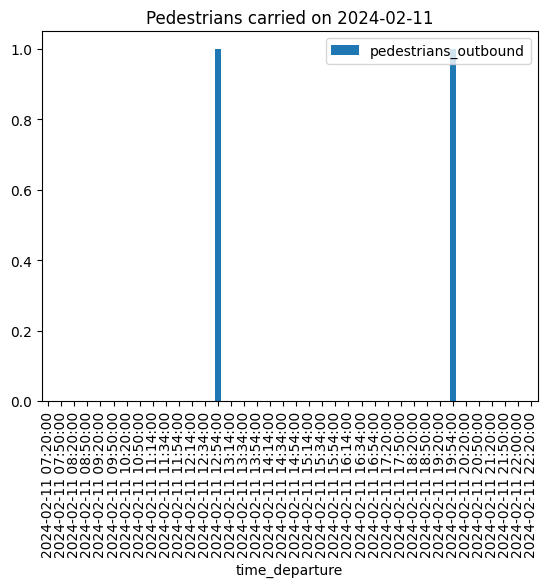

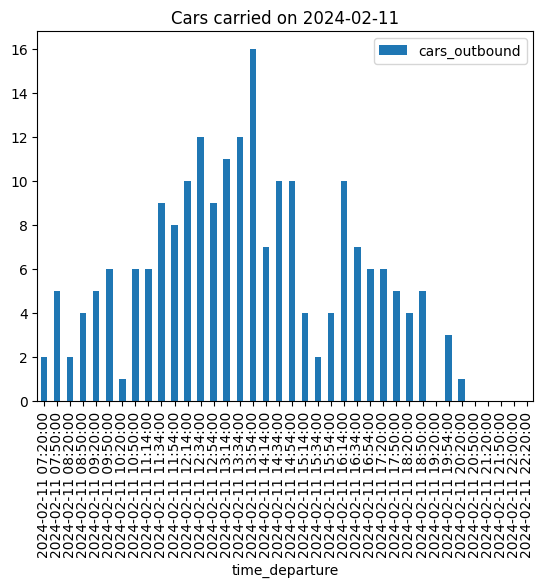

In [ ]:
route17 = trips_df[trips_df["route_id"] == 17] # Filter for line 

#make date good
route17.loc[: ,"time_departure"] = route17["time_departure"].apply(lambda x: datetime.datetime.fromisoformat(x))

route17.plot(x= "time_departure", y="pedestrians_outbound", title="Pedestrians carried on given date")
route17.plot(x= "time_departure", y="cars_outbound", title="Cars carried on given date")

#filter for a random day
route17day = route17[route17["time_departure"] > datetime.datetime(2024, 2, 11)]
route17day = route17day[route17day["time_departure"] < datetime.datetime(2024, 2, 12)]

route17day.plot(kind= "bar", x= "time_departure", y="pedestrians_outbound", title="Pedestrians carried on 2024-02-11")
route17day.plot(kind= "bar", x= "time_departure", y="cars_outbound", title="Cars carried on 2024-02-11")